In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=.09, optimizer='adagrad', loss='mse', scale=1e9, early_stop=False, target_stop=4)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 22945.018
epoch  1 --- Loss --- 14536.001
epoch  2 --- Loss --- 10885.354
epoch  3 --- Loss --- 9009.488
epoch  4 --- Loss --- 7638.7993
epoch  5 --- Loss --- 6619.1714
epoch  6 --- Loss --- 5829.666
epoch  7 --- Loss --- 5157.171
epoch  8 --- Loss --- 4538.8276
epoch  9 --- Loss --- 3965.9053
epoch  10 --- Loss --- 3453.3303
epoch  11 --- Loss --- 3016.833
epoch  12 --- Loss --- 2661.5933
epoch  13 --- Loss --- 2380.9126
epoch  14 --- Loss --- 2161.0085
epoch  15 --- Loss --- 1987.0012
epoch  16 --- Loss --- 1846.4403
epoch  17 --- Loss --- 1729.9816
epoch  18 --- Loss --- 1631.0062
epoch  19 --- Loss --- 1544.9033
epoch  20 --- Loss --- 1468.5062
epoch  21 --- Loss --- 1399.6255
epoch  22 --- Loss --- 1336.7382
epoch  23 --- Loss --- 1278.7681
epoch  24 --- Loss --- 1224.9293
epoch  25 --- Loss --- 1174.6604
epoch  26 --- Loss --- 1127.522
epoch  27 --- Loss --- 1083.185
epoch  28 --- Loss --- 1041.3862
epoch  29 --- Loss --- 1001.9108
epoch  30 --- Loss --- 964

In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 54.45817991495132 minutes


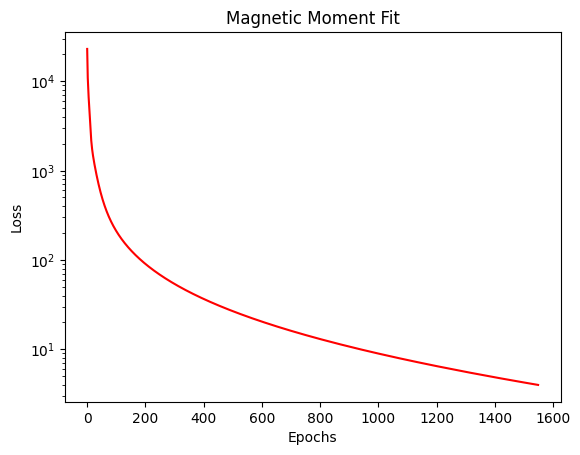

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[-0.00971212 -0.01890159  0.15147133]]
Value:     [[0.0932744  0.19400789 2.7863247 ]]
---- Moment  1 -----
Position:  [[-0.00334514  0.27053005 -0.01217193]]
Value:     [[-0.02472891  1.7289672   0.16643487]]
---- Moment  2 -----
Position:  [[ 0.50681335 -0.00636168 -0.00404671]]
Value:     [[0.93631554 0.03887292 0.02903198]]
